In [36]:
import numpy as np
import matplotlib.pyplot as plt

In [74]:
!pip install yfinance 

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 kB 810.1 kB/s eta 0:00:0036m0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.0/316.0 kB 5.9 MB/s eta 0:00:009.1 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 26.0 MB/s eta 0:00:00m eta 0:00:010:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 8.3 MB/s eta 0:00:00
  Created wheel for frozendict: filename=frozendict-2.4.3-cp311-cp311-linux_x86_64.whl size=16028 sha256=dfabc0e53825217d227c52ddb170a30dc80df0ce981646804ecdb612a238c911
  Stored in directory: /home/lauilhe/.cache/pip/wheels/e9/0d/6a/7c254cc5688827bffc138a55a13bf6fd7b68b6035864f9cfd

In [104]:
#on récupère les données sur une échelle de temps 
import yfinance as yf 

#on prend comme expemple la société générale
sg = 'GLE.PA'

#on récupère les données via yahoo finance 
data = yf.Ticker(sg)

#o nrécupère les prix 
df = data.history(period='1d', start='2020-1-1', end='2020-12-31')

#affichage de la data frame 


#plt.plot(df['Close'])
#montrer qu'on arriv ebien à un hawkes 
#compter le nombre de fois où l'on a abs(close-open) < 1% +1 dès qu'on en a, o note les temps Ti où ça arrive
#dans le vecteur times. 

Tt = []
for i in range(len(df['Close'])) : 
    if (np.abs(df['Close'][i]-df['Open'][i]))/df['Close'][i] > 0.01 : 
        Tt.append(df.index[i])
        
#récupérer les temps         
Tt

[Timestamp('2020-01-02 00:00:00+0100', tz='Europe/Paris'),
 Timestamp('2020-01-08 00:00:00+0100', tz='Europe/Paris'),
 Timestamp('2020-01-10 00:00:00+0100', tz='Europe/Paris'),
 Timestamp('2020-01-15 00:00:00+0100', tz='Europe/Paris'),
 Timestamp('2020-01-16 00:00:00+0100', tz='Europe/Paris'),
 Timestamp('2020-01-24 00:00:00+0100', tz='Europe/Paris'),
 Timestamp('2020-01-31 00:00:00+0100', tz='Europe/Paris'),
 Timestamp('2020-02-05 00:00:00+0100', tz='Europe/Paris'),
 Timestamp('2020-02-06 00:00:00+0100', tz='Europe/Paris'),
 Timestamp('2020-02-10 00:00:00+0100', tz='Europe/Paris'),
 Timestamp('2020-02-12 00:00:00+0100', tz='Europe/Paris'),
 Timestamp('2020-02-13 00:00:00+0100', tz='Europe/Paris'),
 Timestamp('2020-02-20 00:00:00+0100', tz='Europe/Paris'),
 Timestamp('2020-02-24 00:00:00+0100', tz='Europe/Paris'),
 Timestamp('2020-02-25 00:00:00+0100', tz='Europe/Paris'),
 Timestamp('2020-02-27 00:00:00+0100', tz='Europe/Paris'),
 Timestamp('2020-02-28 00:00:00+0100', tz='Europe/Paris'

In [37]:
def intensity(s, T, alpha, beta, mu):
    intensity_value = mu
    for tau in T:
        intensity_value += alpha * np.exp(-beta * (s - tau))
    return intensity_value

In [38]:
#def intensity

In [39]:
def sim_Hawkes(mu, alpha, beta, T):
    t = []
    s = 0
    n = 0
    times = [0]
    events_count = [0]
    intensity_hawkes =[mu]
    DLaccept=[]
    DLrefus=[]
    timesrefus=[]

    while s < T:
        lambda_bar = intensity(s, t, alpha, beta, mu)
        u = np.random.uniform(0, 1)
        w = -np.log(u) / lambda_bar
        s += w
        D = np.random.uniform(0, 1)
        lambda_s = intensity(s, t, alpha, beta, mu)
        if D * lambda_bar <= lambda_s:
            DLaccept.append(D*lambda_bar)
            n += 1
            t.append(s)
            times.append(s)
            events_count.append(n)
            intensity_hawkes.append(lambda_s)
        else:
            DLrefus.append(D*lambda_bar)
            timesrefus.append(s)



    if t[-1] <= T:
        return times, events_count, intensity_hawkes,DLaccept,DLrefus,timesrefus
    else:
        return times[:-1], events_count[:-1], intensity_hawkes[:-1], DLaccept[:-1], DLrefus[:-1], timesrefus[:-1]

[1.2, 1.2, 1.3597851507646772, 1.6680486279069424, 2.210872236301884, 2.6844091952475706, 3.171329578472659, 2.756060136184258, 3.293068847305432, 3.859691327782611, 2.7824948206822637, 2.2698240919551376, 1.941190942159989]


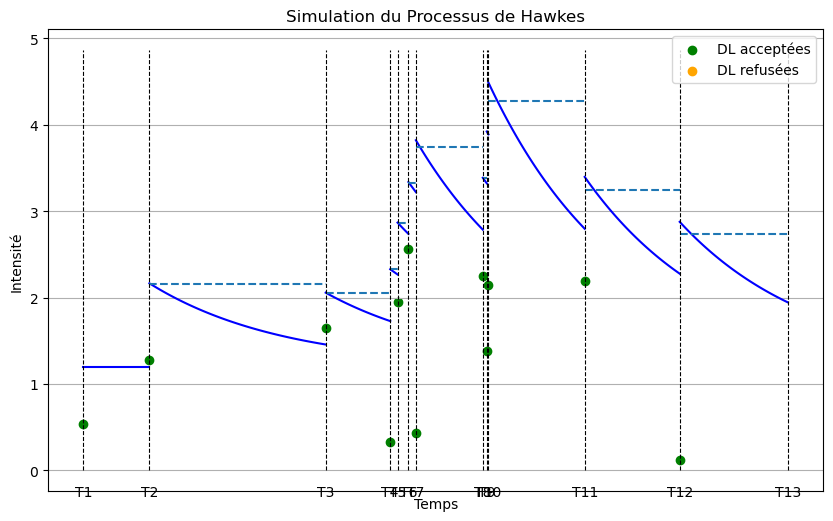

In [72]:
# paramètres
mu = 1.2
alpha = 0.6
beta = 0.8
T = 7

# Simulation du processus de Hawkes
times, events_count, intensity_hawkes, DLaccept, DLrefus, timesrefus = sim_Hawkes(mu, alpha, beta, T)

# Tracé de l'intensité conditionnelle λ(t)
plt.figure(figsize=(10, 6))

# Tracé de la fonction particulière entre les points
for i in range(len(times) - 1):
    x_values = np.linspace(times[i], times[i + 1], 100)  # 100 points entre deux temp
    if i==0 : 
        mu_vect = np.full(len(x_values),mu)
        plt.plot(x_values, mu_vect, color='blue', linestyle='-')
    else : 
        y_values = intensity(x_values, times[:i+1], alpha, beta, mu)
        plt.plot(x_values, y_values, color='blue', linestyle='-')
        #plt.hlines(y_values[i],xmin=times[i],xmax=times[i+1], linestyle='--')
    


# on trace en pointillé rouge le M
#for i in range(len(intensity_hawkes)-1):
#    plt.hlines(y=intensity_hawkes[i], xmin=times[i], xmax=times[i+1], color='red', linestyle='--')

# pour tracer les droites verticales au moment des sauts
for i, t in enumerate(times):
    plt.vlines(x=t, ymin=0, ymax=max(intensity_hawkes)+1, color='black', linestyle='--',linewidth=0.8)

# on nomme les sauts T1, T2 ...
for i, t in enumerate(times):
    plt.text(t, -0.3, f"T{i+1}", ha='center', color='black')

timesall=[]
for element in timesrefus:
    timesall.append(element)
for element in times:
    timesall.append(element)


times = times[:-1]
plt.scatter(times, DLaccept, color='green', label='DL acceptées')

# Tracé des valeurs de DLrefus aux temps timesrefus
plt.scatter(timesrefus, DLrefus, color='orange', label='DL refusées')

print(intensity_hawkes)
plt.xticks([])
plt.xlabel('Temps')
plt.ylabel('Intensité')
plt.title('Simulation du Processus de Hawkes')
plt.legend()
plt.grid(True)
plt.show()